# Forex vs. Market Analyzer: Initial Analysis

Dataset:
* The dataset is taken from the kaggle database for SP500 dataset
* The dataset for the EURUSD is scrapped from a website and modified to take data from 2013 to 2018


In [1]:
# Importing all the necessary packages to perform the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading in some stocks to compare to the EURUSD stock
eurusd_stock = '/Users/atharvajain/Desktop/ml-correlation-model/euro-dollar-exchange-rate-historical-chart.csv'
aapl_stock = '/Users/atharvajain/Desktop/ml-correlation-model/S&P500 Data Set/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv'
wtlw_stock = '/Users/atharvajain/Desktop/ml-correlation-model/S&P500 Data Set/individual_stocks_5yr/individual_stocks_5yr/WLTW_data.csv'
xlnx_stock = '/Users/atharvajain/Desktop/ml-correlation-model/S&P500 Data Set/individual_stocks_5yr/individual_stocks_5yr/XLNX_data.csv'
yum_stock = '/Users/atharvajain/Desktop/ml-correlation-model/S&P500 Data Set/individual_stocks_5yr/individual_stocks_5yr/YUM_data.csv'

In [3]:
#Creating the dataframe for all the datasets to compare them
eurusd_df = pd.read_csv(eurusd_stock)
aapl_df = pd.read_csv(aapl_stock)
wtlw_df = pd.read_csv(wtlw_stock)
xlnx_df = pd.read_csv(xlnx_stock)
yum_df = pd.read_csv(yum_stock)

Exploring the Dataset:
* The dataset contains 2 columns associated with time series like the date and the value of the stock on that particular day.
* We will use this value for out Initial Analysis

In [4]:
eurusd_df.head()

,Date,value
0,2013-02-01,1.3646
1,2013-02-04,1.3513
2,2013-02-05,1.3584
3,2013-02-06,1.3519
4,2013-02-07,1.3395


Creating a new Dataset:
* Concatenating the the closing prices of the domestic equities and the forex market to visualize the available data using seaborn to create a correlation matrix to see if there is a relation between the progress of the EURUSD in terms of the domestic stocks

In [5]:
close_price_stock = pd.concat({
    eurusd_df.Date[0]:eurusd_df['value'],
    aapl_df.Name[0]:aapl_df['close'],
    wtlw_df.Name[0]:wtlw_df['close'],
    xlnx_df.Name[0]:xlnx_df['close'], 
    yum_df.Name[0]:yum_df['close']
}, axis=1)

close_price_stock

,2013-02-01,AAPL,WLTW,XLNX,YUM
0,1.3646,67.8542,125.84,37.51,65.30
1,1.3513,68.5614,119.98,37.46,64.55
2,1.3584,66.8428,114.95,37.58,64.75
3,1.3519,66.7156,116.62,37.80,64.41
4,1.3395,66.6556,114.97,38.44,63.89
...,...,...,...,...,...
1283,1.2510,NaN,NaN,NaN,NaN
1284,1.2463,NaN,NaN,NaN,NaN
1285,1.2367,NaN,NaN,NaN,NaN
1286,1.2377,NaN,NaN,NaN,NaN


In [6]:
close_price_stock = close_price_stock.rename(columns={'2013-02-01' : 'EURUSD'})

In [7]:
#Calculating the percentage change in the stocks
pct_change_stock = close_price_stock.pct_change().dropna()
pct_change_stock.head()

,EURUSD,AAPL,WLTW,XLNX,YUM
1,-0.009746,0.010422,-0.046567,-0.001333,-0.011485
2,0.005254,-0.025067,-0.041924,0.003203,0.003098
3,-0.004785,-0.001903,0.014528,0.005854,-0.005251
4,-0.009172,-0.000899,-0.014149,0.016931,-0.008073
5,-0.002240,-0.013780,0.005045,-0.008325,0.001565


In [8]:
import seaborn as sns  #Importing the seaborn library

In [9]:
#Implementing the correlation matrix of the percentage change of the stocks in relation to the forex market
pct_change_stock.corr()

,EURUSD,AAPL,WLTW,XLNX,YUM
EURUSD,1.000000,-0.029851,0.028030,-0.015559,0.000075
AAPL,-0.029851,1.000000,0.011552,0.266731,0.247651
WLTW,0.028030,0.011552,1.000000,-0.007584,-0.016369
XLNX,-0.015559,0.266731,-0.007584,1.000000,0.244526
YUM,0.000075,0.247651,-0.016369,0.244526,1.000000


Visualization:
* We use a pairplot to visualize the data because a pairs plot allows us to see both distribution of single variables and relationships between two variables. 
* Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python.

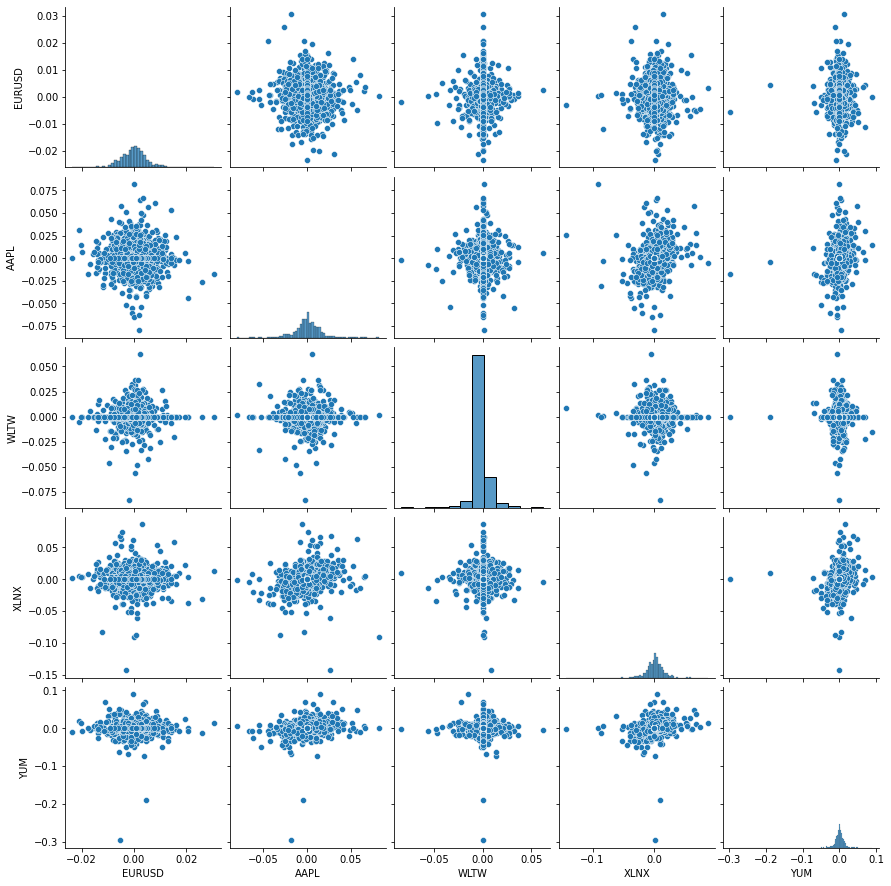

In [10]:
sns.pairplot(pct_change_stock)
plt.show()

Final Thoughts:
* From the pairplots we can establish that there is no correlation between the EURUSD and the other stocks

Calculating the Volatility:
* Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
* Calculate the Annual rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
* Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [11]:
rolling_lt = pct_change_stock.EURUSD.rolling(366)

In [12]:
# Rolling Average
rolling_avg_lt = rolling_lt.mean()

# Using shift function to shift "Monthly Average" from next day 
# cause its considering average price of current day as well which is not correct
rolling_avg_lt = rolling_avg_lt.shift()

# Drop NaNs from dataframe
rolling_avg_lt = rolling_avg_lt.dropna()
rolling_avg_lt.head(10)

367   -1.577634e-05
368    1.044929e-05
369   -4.108473e-06
370   -2.753139e-06
371    2.169898e-05
372    2.761526e-05
373    1.314721e-05
374    4.786447e-06
375   -2.980524e-07
376    1.615132e-05
Name: EURUSD, dtype: float64

In [13]:
std_dev_lt = rolling_lt.std().shift().dropna()
std_dev_lt.head(10)

367    0.004094
368    0.004062
369    0.004052
370    0.004051
371    0.004022
372    0.004021
373    0.004020
374    0.004015
375    0.004017
376    0.004001
Name: EURUSD, dtype: float64

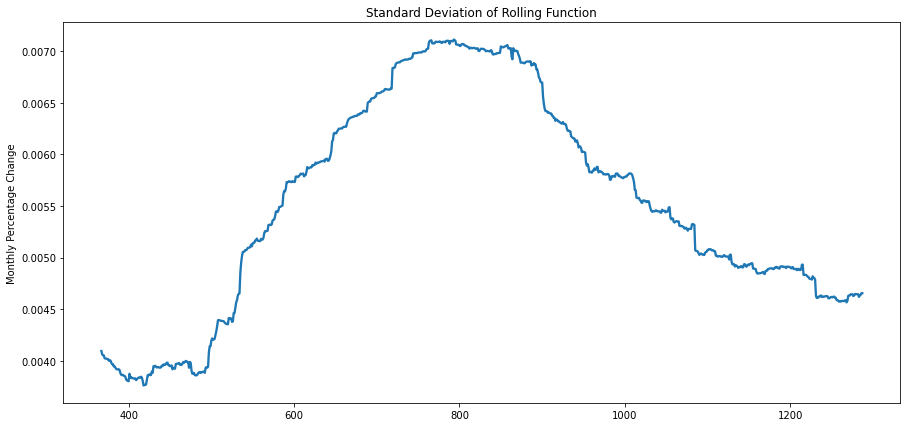

In [14]:
std_dev_lt.plot(figsize=(15,7), linewidth=2.3, title='Standard Deviation of Rolling Function')
plt.ylabel('Monthly Percentage Change')
plt.show()

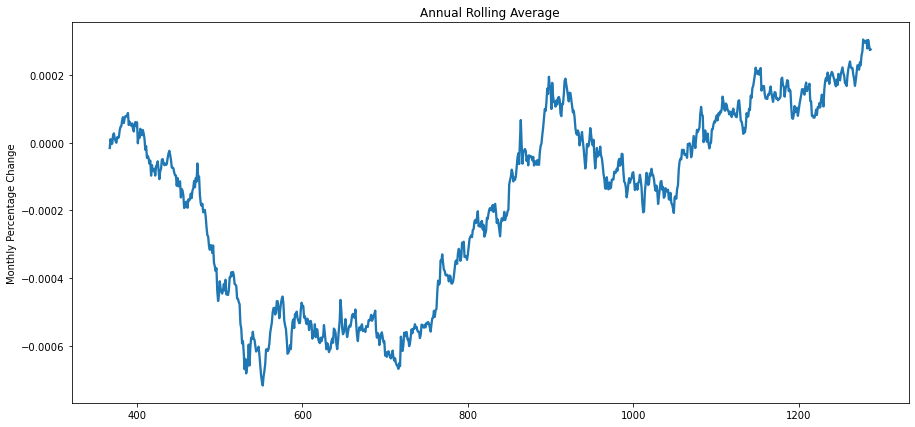

In [19]:
rolling_avg_lt.plot(figsize=(15,7), linewidth=2.3, title='Annual Rolling Average')
plt.ylabel('Monthly Percentage Change')
plt.show()

In [16]:
#Comparing the volatility of stocks with EURUSD
aapl_df = pd.read_csv('/Users/atharvajain/Desktop/ml-correlation-model/S&P500 Data Set/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv')

aapl_df.date = pd.to_datetime(aapl_df.date)

aapl_df.set_index('date', inplace=True)

# Calculate the percentage change for Closing price of AAPL
aapl_df_pct_change = aapl_df.close.pct_change().dropna()

# Calculate the volatility for AAPL
aapl_df_volatility = aapl_df_pct_change.rolling(366).std().shift().dropna()

aapl_df_volatility.head()

date
2014-07-25    0.015081
2014-07-28    0.015076
2014-07-29    0.015028
2014-07-30    0.015032
2014-07-31    0.015033
Name: close, dtype: float64

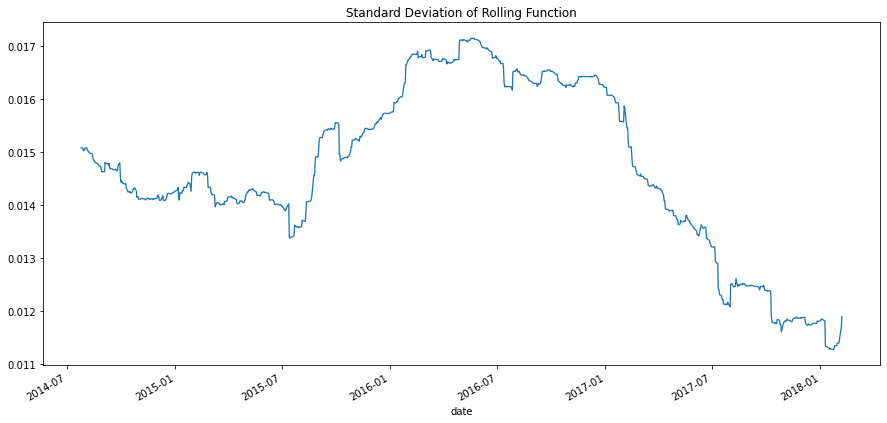

In [17]:
aapl_df_volatility.plot(figsize=(15,7), linewidth=1.3, title='Standard Deviation of Rolling Function')
plt.show()

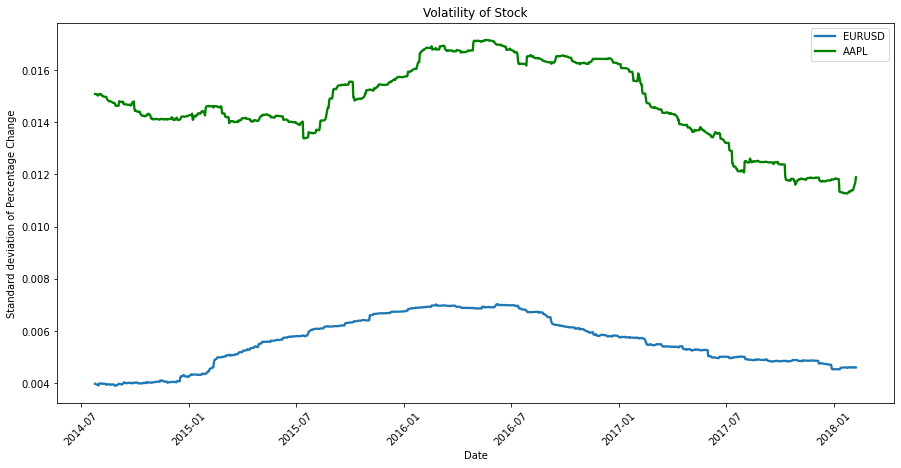

In [18]:
plt.figure(figsize=(15,7))

# Plot the all two volatility
plt.plot(aapl_df_volatility.index, pct_change_stock.EURUSD.rolling(395).std().shift().dropna(), label='EURUSD', linewidth=2.3)
plt.plot(aapl_df_volatility.index, aapl_df_volatility, label='AAPL', color='g', linewidth=2.3)

plt.title('Volatility of Stock')
plt.xlabel('Date')
plt.ylabel('Standard deviation of Percentage Change')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Conclusion:
* From the above graph comparing the AAPL stock and the EURUSD we can establish that there is no correlation between the 2
* But it is too soon to say anything without looking at the future prospects of the stocks and seeing whether they have some sort of relationship in terms of influnce over a longer period of time.
* My next file is the actual model to predict whether there is going to be a relationship in the future